In [1]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform
# baidu translator
import json
from hashlib import md5
import random
import requests

from sklearn.impute import KNNImputer
import pickle

In [2]:
print(platform.python_version())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  
print(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print(torch.__version__)

3.9.12
Num GPUs Available:  1
cuda
2.1.1+cu121


In [3]:
pd.set_option('display.max_columns',100)

In [4]:
os.chdir(r"E:/CNSI_project/demo_and_data_5.0/")

In [5]:
def FileClear(top):
    for root, dirs, files in os.walk(top, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        for name in dirs:
            os.rmdir(os.path.join(root, name))

In [6]:
aim1_df1 = pd.read_excel('E:/CNSI_project/demo_and_data_5.0/Processed_data/paper/aim1_dataset_label_3to1.xlsx')
aim1_df1

subject_id     hadm_id   chartdate  B_pO2  B_Albumin  B_Creatinine  \
0       10002557         NaN  2147-03-26    NaN        NaN           0.7   
1       10002559         NaN  2179-06-05    NaN        3.6           0.6   
2       10003019  21616816.0  2174-09-18    NaN        2.6           1.2   
3       10005808  26543907.0  2119-01-02    NaN        NaN           0.8   
4       10006269  27357430.0  2124-06-26    NaN        4.9           1.0   
...          ...         ...         ...    ...        ...           ...   
9256    19994772  29606061.0  2180-12-18    NaN        NaN           0.8   
9257    19994772         NaN  2181-03-13    NaN        NaN           0.7   
9258    19995080  23057109.0  2147-07-13    NaN        2.3           0.7   
9259    19997843         NaN  2120-11-18   99.0        3.4           0.8   
9260    19999784  24935234.0  2119-07-07    NaN        4.3           NaN   

      B_Glucose   B_H  B_I  B_LactateDehydrogenase  B_Potassium  B_Sodium  \
0          92.0   NaN  NaN                     NaN          3.7     144.0   
1          95.0   NaN  NaN                   187.0          3.7     137.0   
2          76.0   NaN  NaN                     NaN          4.9     137.0   
3         105.0   NaN  NaN                     NaN          3.9     142.0   
4         111.0  12.0  2.0                     NaN          4.6     128.0   
...         ...   ...  ...                     ...          ...       ...   
9256      155.0   NaN  NaN                     NaN          3.6     137.0   
9257      140.0   NaN  NaN                   180.0          3.7     140.0   
9258       53.0   NaN  NaN                     NaN          3.8     135.0   
9259       87.0   8.0  5.0                   453.0          3.9     145.0   
9260        NaN   3.0  1.0                   102.0          NaN       NaN   

      B_Hemoglobin  B_lymphocytes  B_MCHC  B_MonocytesPercentage  B_Platelet  \
0             11.7           21.9    33.0                    3.8       226.0   
1             12.6           11.2    34.3                    5.9       198.0   
2              9.7            NaN    30.8                    NaN       557.0   
3             15.3           26.1    34.9                    4.0       256.0   
4              8.4            6.6    27.2                    7.7       225.0   
...            ...            ...     ...                    ...         ...   
9256          11.6           13.0    36.0                    8.5       257.0   
9257          13.0            7.2    36.5                    5.6       218.0   
9258          10.7           24.3    32.3                    6.6       377.0   
9259          11.0           18.5    32.3                   11.8        88.0   
9260          12.6           20.5    32.1                    6.6       275.0   

      B_PTT  C_Glucose  C_Protein  B_MonocyteCount  B_ImmatureGranulocytes  \
0      27.5       55.0       29.0              NaN                     NaN   
1       NaN       61.0       24.0              NaN                     NaN   
2       NaN       61.0       75.0              NaN                     NaN   
3       NaN       60.0       72.0              NaN                     NaN   
4       NaN       57.0      100.0             0.77                     0.4   
...     ...        ...        ...              ...                     ...   
9256    NaN       70.0      295.0              NaN                     NaN   
9257    NaN        1.0      590.0              NaN                     NaN   
9258   27.2       42.0       44.0              NaN                     NaN   
9259   30.6       87.0       21.0             0.83                     0.4   
9260    NaN       57.0      146.0             0.33                     0.2   

      B_RDW-SD  C_Lymphs  C_Macrophage  C_Polys  resprate  pain  acuity  \
0          NaN     100.0           NaN      0.0       NaN   NaN     NaN   
1          NaN      43.0           2.0     17.0       NaN   NaN     NaN   
2          NaN      41.0          49.0     10

In [7]:
aim1_df1 = aim1_df1.drop(columns=['subject_id','hadm_id','chartdate','label_from_paper','Corrected culture result label'], axis=1)
aim1_df1 = aim1_df1.rename(columns={'culture':'culture_old', 'Label_merged':'culture'}, inplace=False)
aim1_df1

B_pO2  B_Albumin  B_Creatinine  B_Glucose   B_H  B_I  \
0       NaN        NaN           0.7       92.0   NaN  NaN   
1       NaN        3.6           0.6       95.0   NaN  NaN   
2       NaN        2.6           1.2       76.0   NaN  NaN   
3       NaN        NaN           0.8      105.0   NaN  NaN   
4       NaN        4.9           1.0      111.0  12.0  2.0   
...     ...        ...           ...        ...   ...  ...   
9256    NaN        NaN           0.8      155.0   NaN  NaN   
9257    NaN        NaN           0.7      140.0   NaN  NaN   
9258    NaN        2.3           0.7       53.0   NaN  NaN   
9259   99.0        3.4           0.8       87.0   8.0  5.0   
9260    NaN        4.3           NaN        NaN   3.0  1.0   

      B_LactateDehydrogenase  B_Potassium  B_Sodium  B_Hemoglobin  \
0                        NaN          3.7     144.0          11.7   
1                      187.0          3.7     137.0          12.6   
2                        NaN          4.9     137.0           9.7   
3                        NaN          3.9     142.0          15.3   
4                        NaN          4.6     128.0           8.4   
...                      ...          ...       ...           ...   
9256                     NaN          3.6     137.0          11.6   
9257                   180.0          3.7     140.0          13.0   
9258                     NaN          3.8     135.0          10.7   
9259                   453.0          3.9     145.0          11.0   
9260                   102.0          NaN       NaN          12.6   

      B_lymphocytes  B_MCHC  B_MonocytesPercentage  B_Platelet  B_PTT  \
0              21.9    33.0                    3.8       226.0   27.5   
1              11.2    34.3                    5.9       198.0    NaN   
2               NaN    30.8                    NaN       557.0    NaN   
3              26.1    34.9                    4.0       256.0    NaN   
4               6.6    27.2                    7.7       225.0    NaN   
...             ...     ...                    ...         ...    ...   
9256           13.0    36.0                    8.5       257.0    NaN   
9257            7.2    36.5                    5.6       218.0    NaN   
9258           24.3    32.3                    6.6       377.0   27.2   
9259           18.5    32.3                   11.8        88.0   30.6   
9260           20.5    32.1                    6.6       275.0    NaN   

      C_Glucose  C_Protein  B_MonocyteCount  B_ImmatureGranulocytes  B_RDW-SD  \
0          55.0       29.0              NaN                     NaN       NaN   
1          61.0       24.0              NaN                     NaN       NaN   
2          61.0       75.0              NaN                     NaN       NaN   
3          60.0       72.0              NaN                     NaN       NaN   
4          57.0      100.0             0.77                     0.4      45.3   
...         ...        ...              ...                     ...       ...   
9256       70.0      295.0              NaN                     NaN       NaN   
9257        1.0      590.0              NaN                     NaN       NaN   
9258       42.0       44.0              NaN                     NaN       NaN   
9259       87.0       21.0             0.83                     0.4      53.9   
9260       57.0      146.0             0.33                     0.2      44.5   

      C_Lymphs  C_Macrophage  C_Polys  resprate  pain  acuity  culture_old  \
0        100.0           NaN      0.0       NaN   NaN     NaN            0   
1         43.0           2.0     17.0       NaN   NaN     NaN            0   
2         41.0          49.0     10.0      16.0  13.0     2.0            0   
3         62.0           NaN      0.0       NaN   NaN     NaN            0   
4         96.0           NaN      1.0      19.0   9.0     3.0            0   
...        ...           ...      ...       ...   ...     ...          ...   
9256       0.0           NaN    100.

In [8]:
aim1_df1.columns.tolist()

['B_pO2',
 'B_Albumin',
 'B_Creatinine',
 'B_Glucose',
 'B_H',
 'B_I',
 'B_LactateDehydrogenase',
 'B_Potassium',
 'B_Sodium',
 'B_Hemoglobin',
 'B_lymphocytes',
 'B_MCHC',
 'B_MonocytesPercentage',
 'B_Platelet',
 'B_PTT',
 'C_Glucose',
 'C_Protein',
 'B_MonocyteCount',
 'B_ImmatureGranulocytes',
 'B_RDW-SD',
 'C_Lymphs',
 'C_Macrophage',
 'C_Polys',
 'resprate',
 'pain',
 'acuity',
 'culture_old',
 'C_LeukocyteCount',
 'culture']

In [9]:
df_input = aim1_df1.copy()
df_input.culture.value_counts()

0    8857
1     404
Name: culture, dtype: int64

In [10]:
# create a new folders

path3 = os.path.join(r'Processed_data/MIMIC/TrainingSet/', r'breakdowns_Transformed1_corrected')
if os.path.exists(path3) :
    FileClear(path3)
else:
    os.mkdir(path3)

In [11]:
# Breakdown the converted data and then automatically determine whether the conversion was successful or not.
new_cols1 = list(df_input.columns)[:-1]
for each in new_cols1:
    df_count = df_input[each].value_counts()
    df_count["空值"] = df_input.shape[0] - df_count.sum()
    

    temp1 = list(df_count.index)
    i = 0
    for each1 in temp1:
        if each1 == "空值":
            continue
        elif math.isnan(pd.to_numeric(each1 , errors='coerce')):
            i += 1
        else:
            continue
    if i == 0:
        print(each,"转换成功！")
    else:
        print(each,"的转换出了问题！")
    
    each = each.replace('/','_')
    each = each.replace('<','_')
    each = each.replace('>','_')
    path = os.path.join(r"./Processed_data/MIMIC/TrainingSet/breakdowns_Transformed1_corrected", each+r"_breakdown1.csv")
    df_count.to_csv(path, encoding='utf-8-sig', index = True)

B_pO2 转换成功！
B_Albumin 转换成功！
B_Creatinine 转换成功！
B_Glucose 转换成功！
B_H 转换成功！
B_I 转换成功！
B_LactateDehydrogenase 转换成功！
B_Potassium 转换成功！
B_Sodium 转换成功！
B_Hemoglobin 转换成功！
B_lymphocytes 转换成功！
B_MCHC 转换成功！
B_MonocytesPercentage 转换成功！
B_Platelet 转换成功！
B_PTT 转换成功！
C_Glucose 转换成功！
C_Protein 转换成功！
B_MonocyteCount 转换成功！
B_ImmatureGranulocytes 转换成功！
B_RDW-SD 转换成功！
C_Lymphs 转换成功！
C_Macrophage 转换成功！
C_Polys 转换成功！
resprate 转换成功！
pain 转换成功！
acuity 转换成功！
culture_old 转换成功！
C_LeukocyteCount 转换成功！


In [12]:
df_input.groupby('culture').count()

B_pO2  B_Albumin  B_Creatinine  B_Glucose   B_H   B_I  \
culture                                                          
0         1350       2757          8706       8445  2463  2463   
1          126         95           400        397   126   126   

         B_LactateDehydrogenase  B_Potassium  B_Sodium  B_Hemoglobin  \
culture                                                                
0                          2190         8635      8636          8812   
1                            72          399       399           402   

         B_lymphocytes  B_MCHC  B_MonocytesPercentage  B_Platelet  B_PTT  \
culture                                                                    
0                 5388    8810                   5388        8810   4989   
1                  160     402                    160         402    254   

         C_Glucose  C_Protein  B_MonocyteCount  B_ImmatureGranulocytes  \
culture                                                                  
0             8494       8596             1818                    1474   
1              366        379               69                      54   

         B_RDW-SD  C_Lymphs  C_Macrophage  C_Polys  resprate  pain  acuity  \
culture                                                                      
0            3178      8733          1876     8733      2422  2302    2781   
1             160       390           103      390       131   110     158   

         culture_old  C_LeukocyteCount  
culture                                 
0               8857              8730  
1                404               390

In [13]:
df_input.groupby('culture').describe().pivot

<bound method DataFrame.pivot of           B_pO2                                                           \
          count        mean        std   min    25%    50%    75%    max   
culture                                                                    
0        1350.0  125.257037  90.088466  13.0  71.00  102.0  155.0  575.0   
1         126.0  121.595238  60.342778  37.0  83.25  110.5  154.0  386.0   

        B_Albumin                                              B_Creatinine  \
            count      mean       std  min  25%  50%  75%  max        count   
culture                                                                       
0          2757.0  3.743344  0.678653  1.2  3.3  3.8  4.2  5.8       8706.0   
1            95.0  3.314737  0.704087  1.4  2.9  3.3  3.7  5.0        400.0   

                                                      B_Glucose              \
             mean       std  min  25%  50%  75%   max     count        mean   
culture                         

In [14]:
df_input.groupby('culture').mean().pivot

<bound method DataFrame.pivot of               B_pO2  B_Albumin  B_Creatinine   B_Glucose        B_H       B_I  \
culture                                                                         
0        125.257037   3.743344      1.029267  121.689639  27.962241  0.857897   
1        121.595238   3.314737      0.921500  132.478589  27.857143  0.730159   

         B_LactateDehydrogenase  B_Potassium    B_Sodium  B_Hemoglobin  \
culture                                                                  
0                    331.763014     4.036144  138.924618     11.779369   
1                    378.041667     3.941353  138.541353     11.013184   

         B_lymphocytes     B_MCHC  B_MonocytesPercentage  B_Platelet  \
culture                                                                
0            20.892743  33.420760               6.347253  238.496822   
1            14.601250  33.310945               6.313125  279.957711   

             B_PTT  C_Glucose   C_Protein  B_MonocyteCou

In [15]:
# create a new folders

path4 = os.path.join(r'./Processed_data/MIMIC/TrainingSet/image1_corrected', r'distribution_map')
if os.path.exists(path4) :
    FileClear(path4)
else:
    os.mkdir(path4)

In [16]:
# define a function to plot distribution of data on CPR label subgroups

def plot_distribution(data_select, size_bin) :    
    g = sns.FacetGrid(df_input, hue="culture", palette="Set1")
    g = g.map(sns.distplot, data_select, bins=size_bin, hist=False, rug=True)
    g.add_legend()

    data_select = data_select.replace('/','_')
    data_select = data_select.replace('<','_')
    data_select = data_select.replace('>','_')
    file_path = os.path.join(path4, str(data_select)+'.jpeg')
    g.savefig(file_path, dpi=500, bbox_inches='tight')

In [17]:
colname = df_input.columns
colname

Index(['B_pO2', 'B_Albumin', 'B_Creatinine', 'B_Glucose', 'B_H', 'B_I',
       'B_LactateDehydrogenase', 'B_Potassium', 'B_Sodium', 'B_Hemoglobin',
       'B_lymphocytes', 'B_MCHC', 'B_MonocytesPercentage', 'B_Platelet',
       'B_PTT', 'C_Glucose', 'C_Protein', 'B_MonocyteCount',
       'B_ImmatureGranulocytes', 'B_RDW-SD', 'C_Lymphs', 'C_Macrophage',
       'C_Polys', 'resprate', 'pain', 'acuity', 'culture_old',
       'C_LeukocyteCount', 'culture'],
      dtype='object')

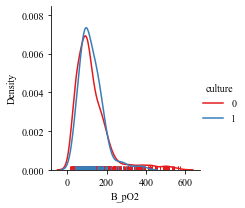

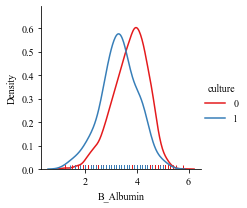

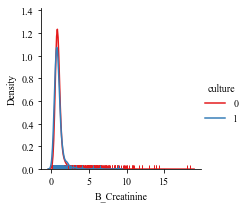

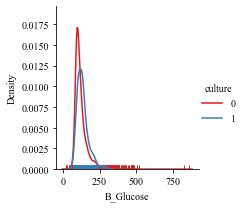

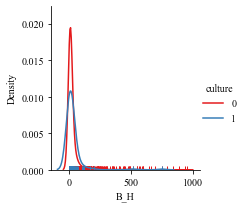

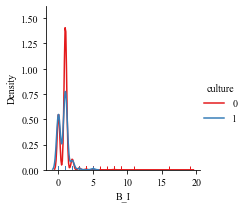

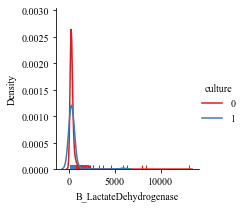

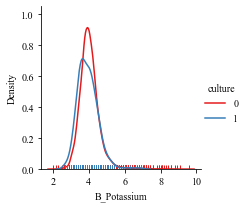

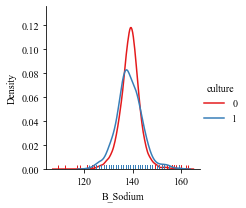

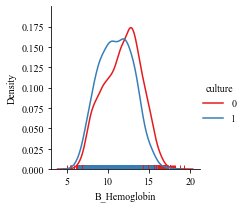

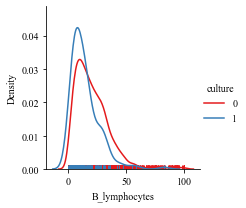

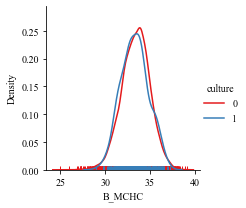

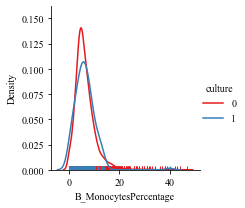

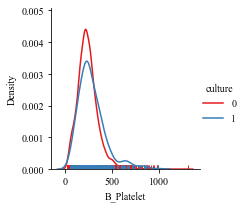

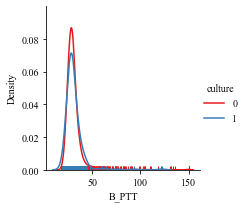

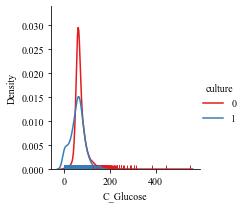

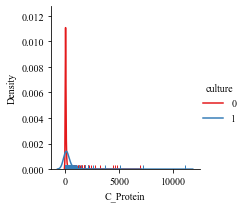

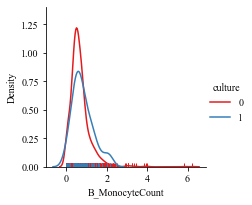

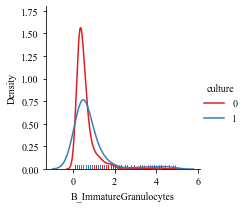

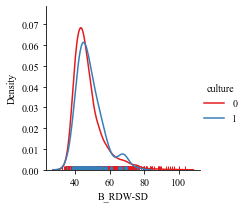

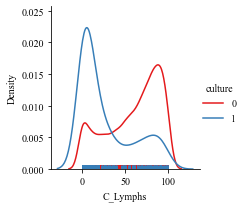

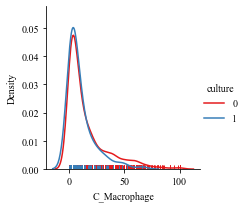

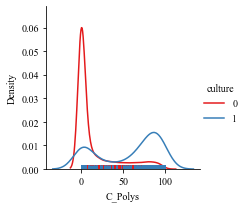

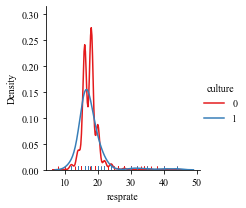

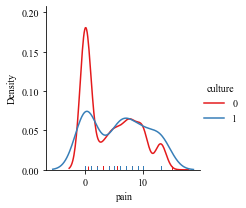

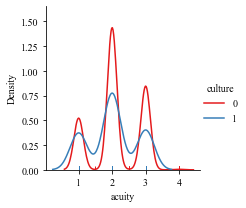

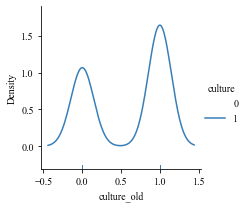

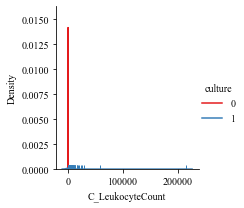

In [18]:
# feature distribution of the numerical variables on CPR labels
for col in colname[:-1]: 
    plot_distribution(col, 20)

In [19]:
# generate correlation matrix of the numerical variables 
df_input1 = df_input.drop(['culture'], 1)
#correlation
correlation = df_input1.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [23]:
FullNamesList = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [24]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
            'size': 25,}

In [25]:
temp1 = corr_array<-0.4
temp2 = corr_array>0.4
corr_bool = temp1 | temp2
condition = corr_bool==False
array_new = np.where(condition, corr_bool, "*")
array_new = np.where(array_new=='*', array_new, "")
array_new

array([['*', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '*', '', '', '', '', '', '', '', '*', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '*', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '*', '', '', '', '', '', '', '', '', '', '', '', '*',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '*', '', '', '*', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '*', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '*', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '*', '', '', '*', '', '', '', '', '', '', '', '',
        '', '

In [26]:
np.isnan(corr_array[9:10,:10])

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [27]:
np.where(np.isnan(corr_array[9:10,:10]))

(array([], dtype=int64), array([], dtype=int64))

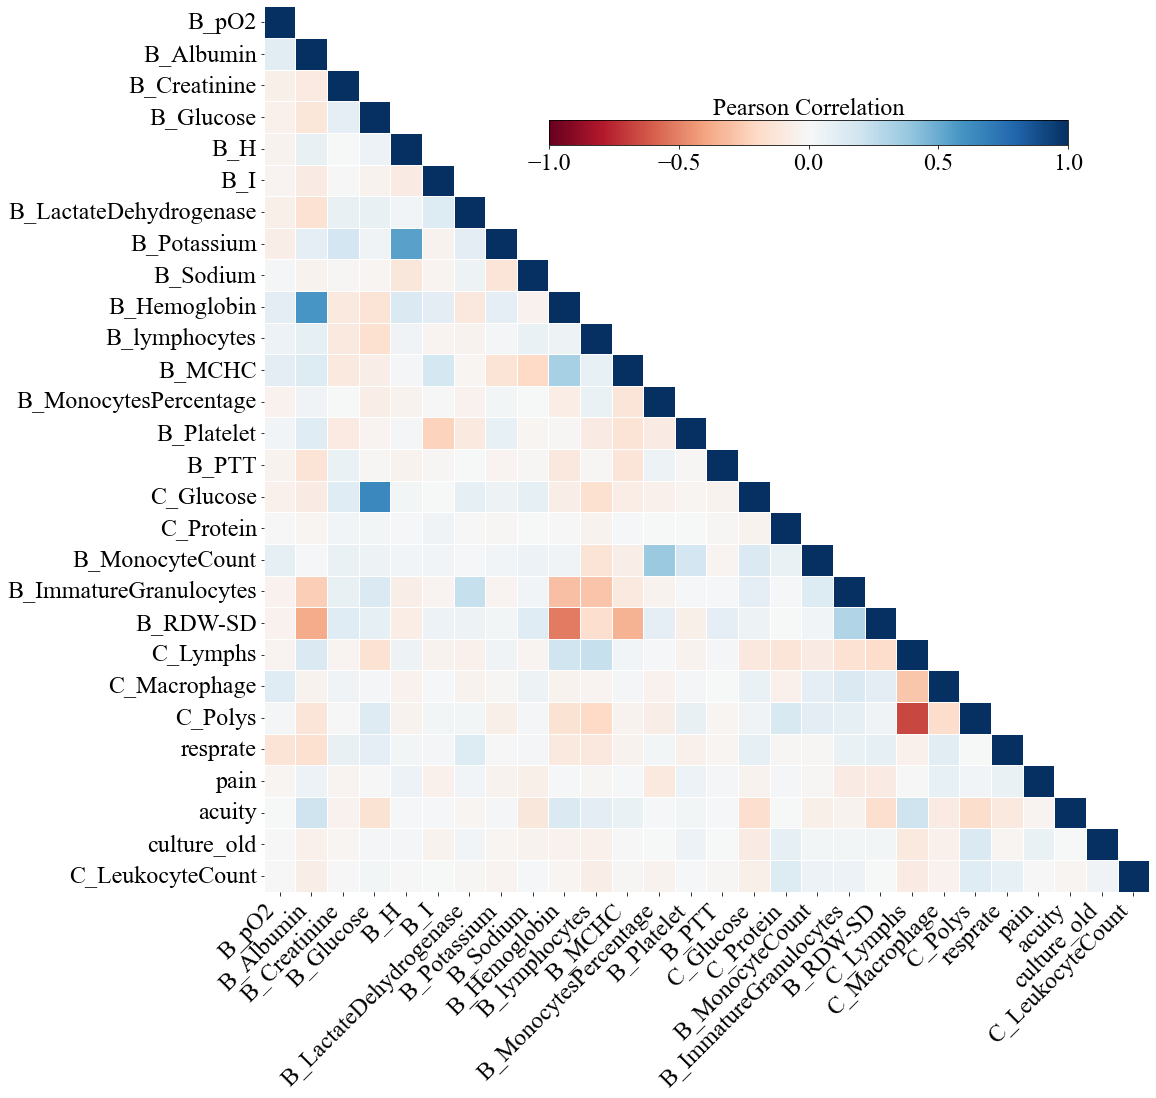

In [28]:
# Drawing the lower triangle
mask = np.ones_like(corr_array, dtype=np.bool)

fig = plt.figure(figsize=(16,16))
ax = sns.heatmap(data=corr_array, 
            cmap='RdBu',
            square=True,
            mask = mask,
            linewidths=1,
            linecolor="white",
#             annot=array_new,
            fmt='',
            annot_kws={"size":20},
            xticklabels=FullNamesList,
            yticklabels=FullNamesList,
            vmin=-1, vmax=1,
            cbar=False,
#             cbar_kws={"shrink": 0.6, "location":'top', "use_gridspec":False},
           )
plt.xticks([i + 0.5 for i in range(len(FullNamesList))], FullNamesList, rotation = 45, fontsize=24, ha='right', fontname="Times New Roman")  # ha为文字的旋转中心
plt.yticks([i + 0.5 for i in range(len(FullNamesList))], FullNamesList, rotation = 0, fontsize=24, ha='right')

position = fig.add_axes([0.47, 0.85, 0.45, 0.022])
cbar1 = plt.colorbar(ax.collections[0], cax=position, orientation='horizontal', )
cbar1.ax.tick_params(labelsize=24)
# cbar1.set_label(r'Pearson Correlation1',fontdict=font, loc='center')
cbar1.ax.set_title(r'Pearson Correlation',fontdict=font, fontsize=24)

plt.tight_layout()
plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1/Correlation_Matrix_corrected.tif', dpi=300, format='tiff')

plt.show()

In [31]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
       'size' : 25}

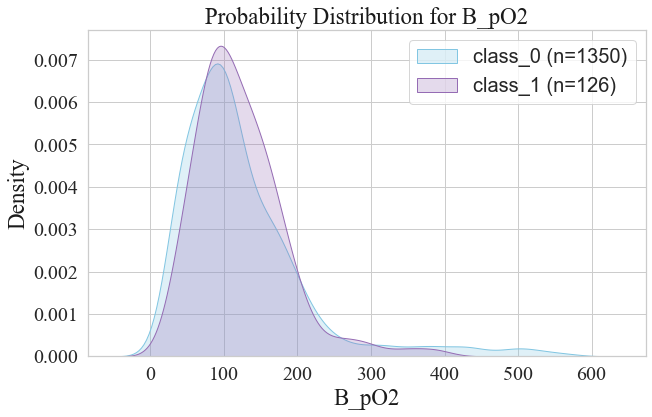

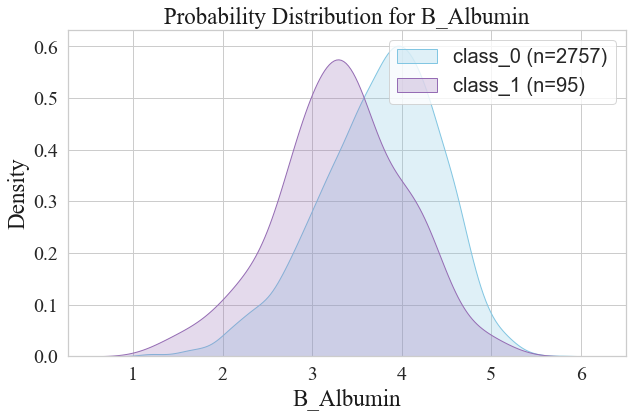

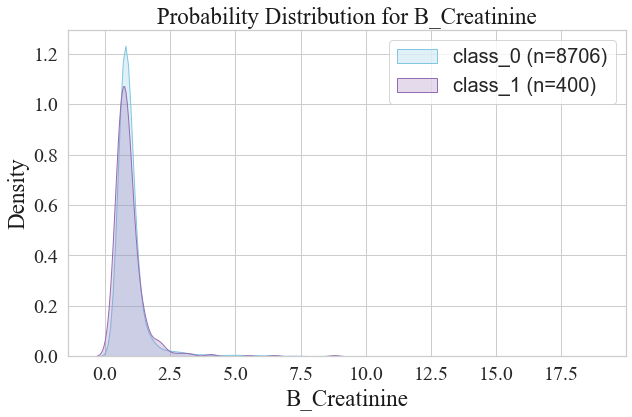

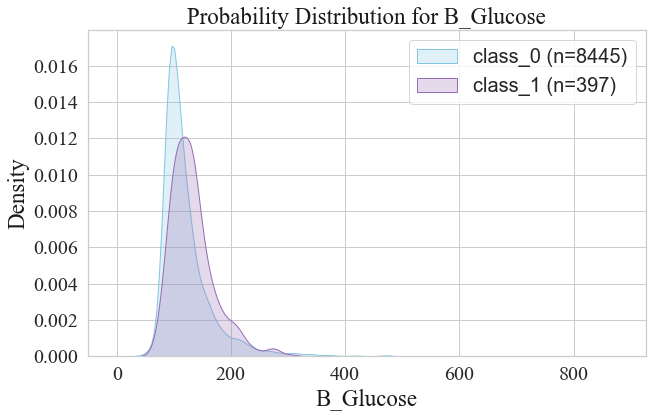

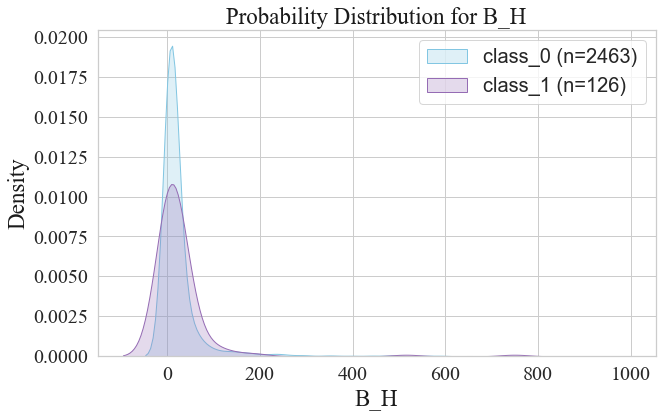

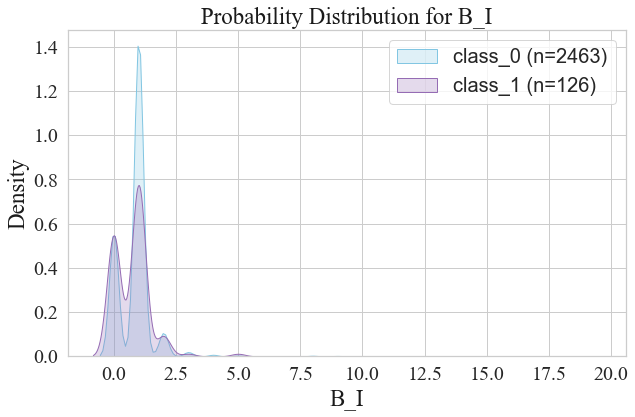

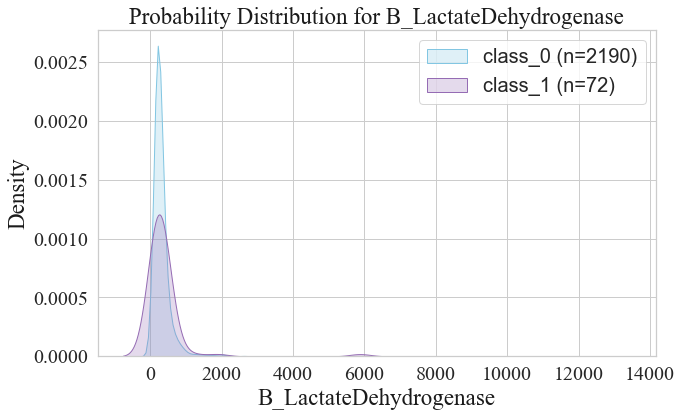

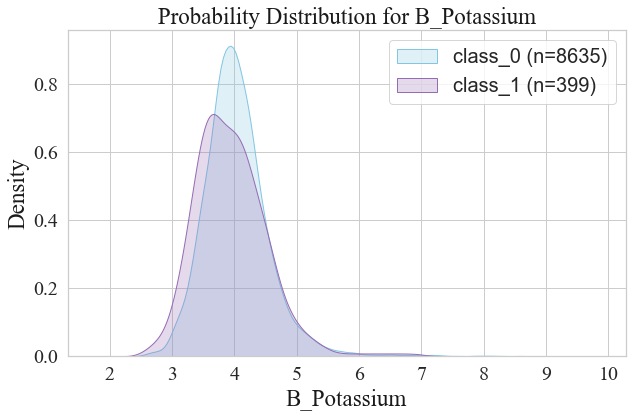

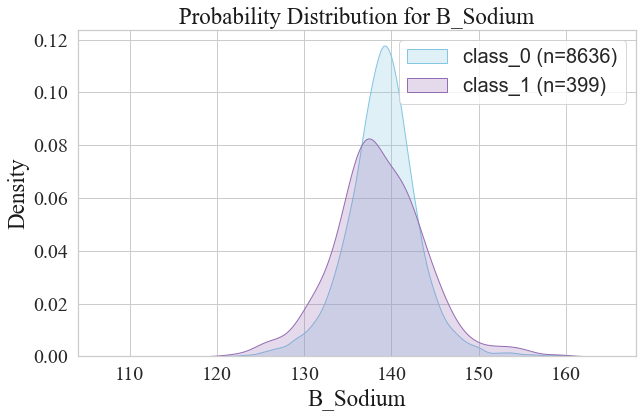

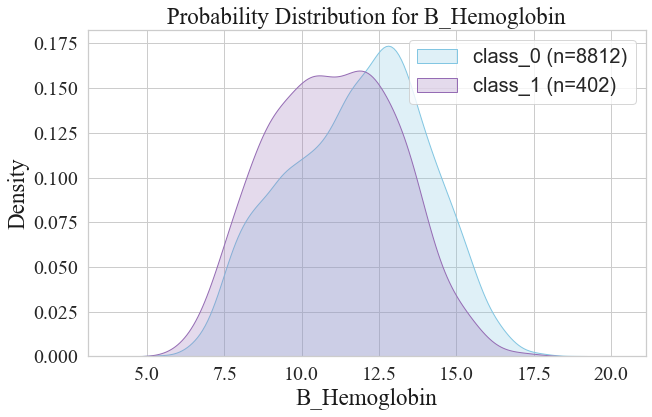

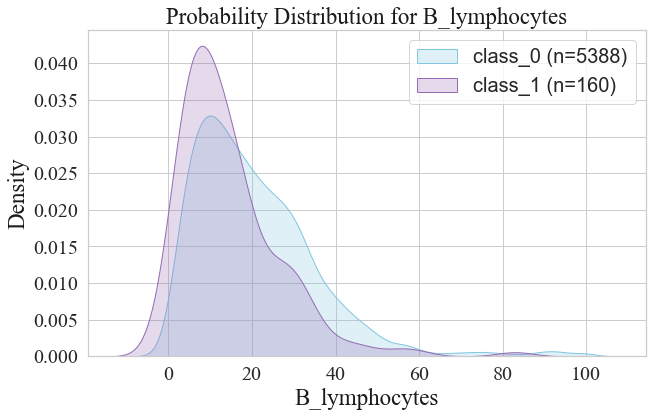

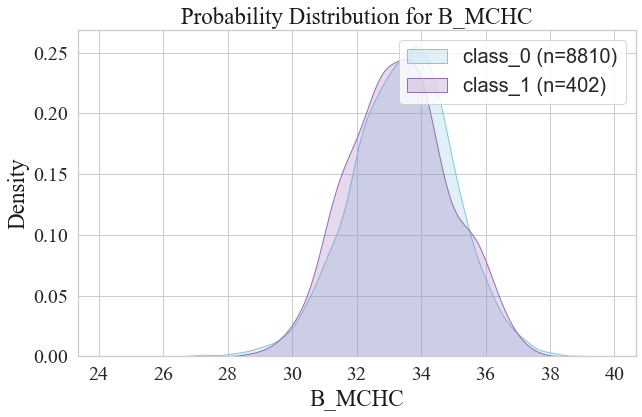

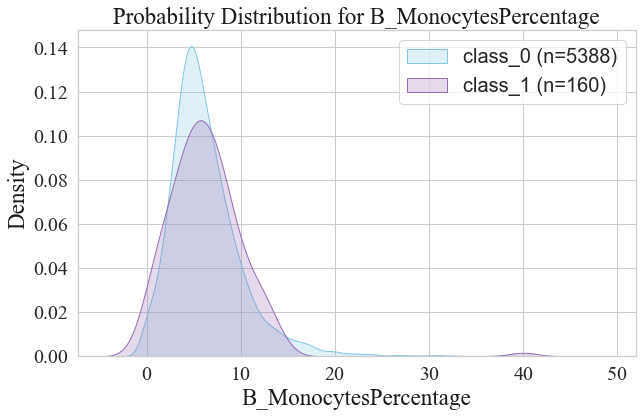

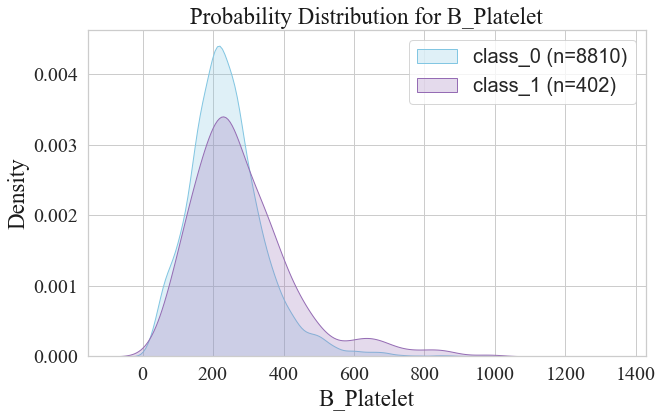

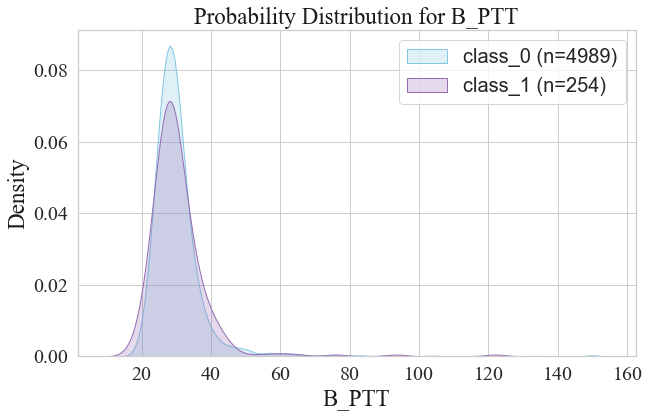

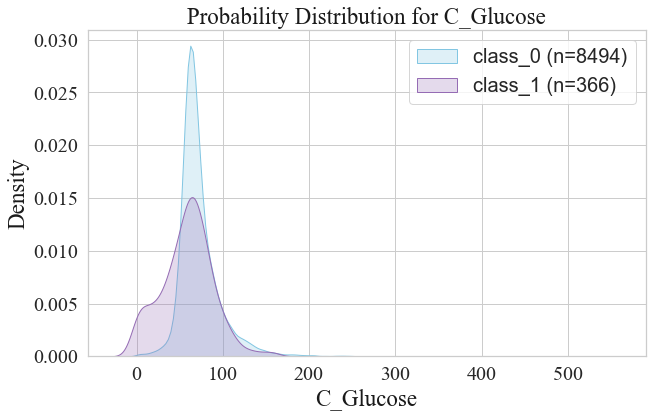

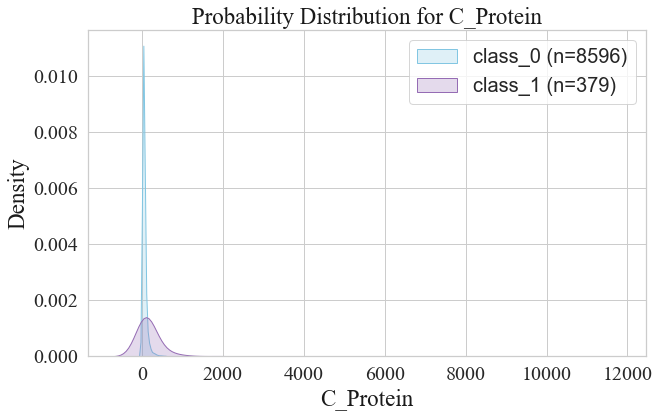

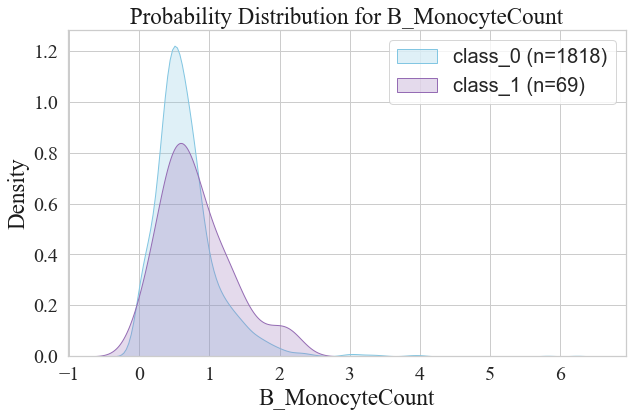

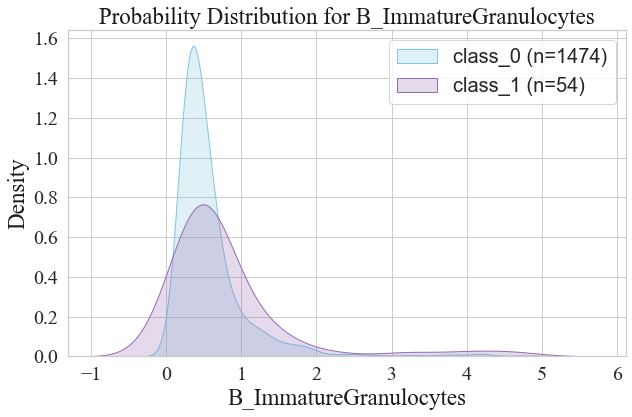

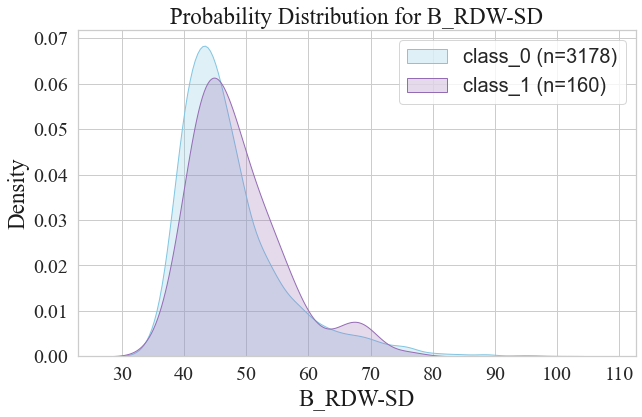

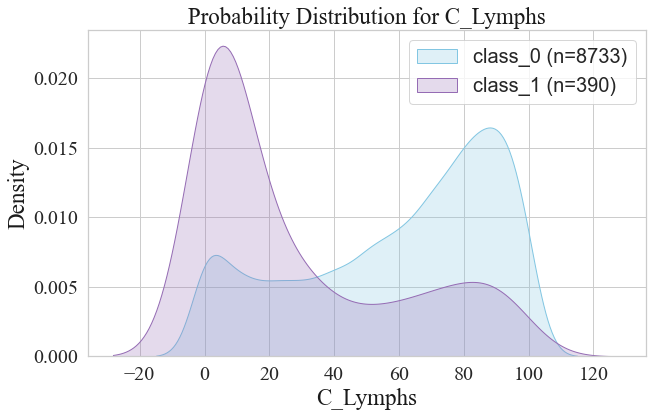

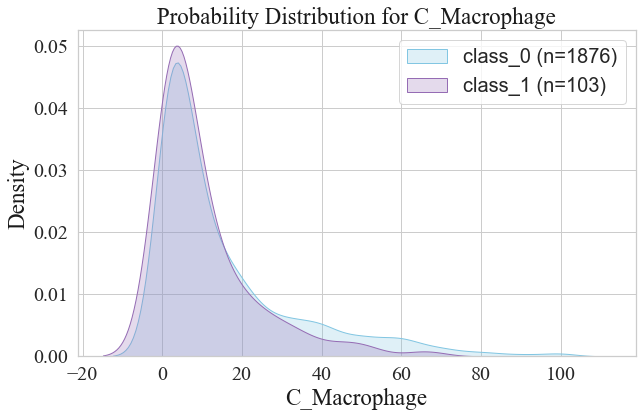

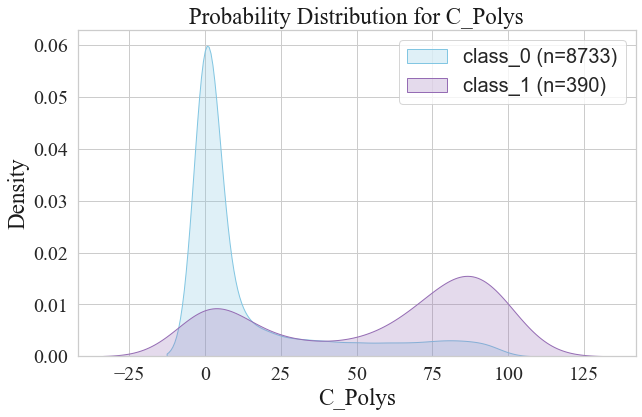

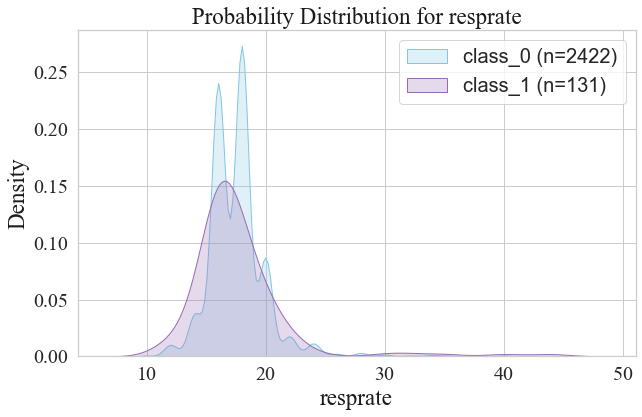

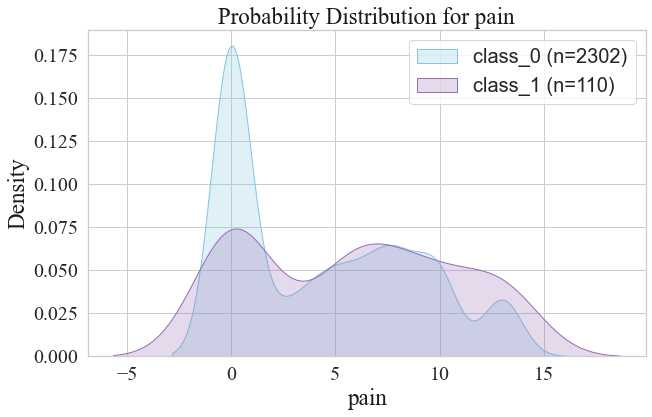

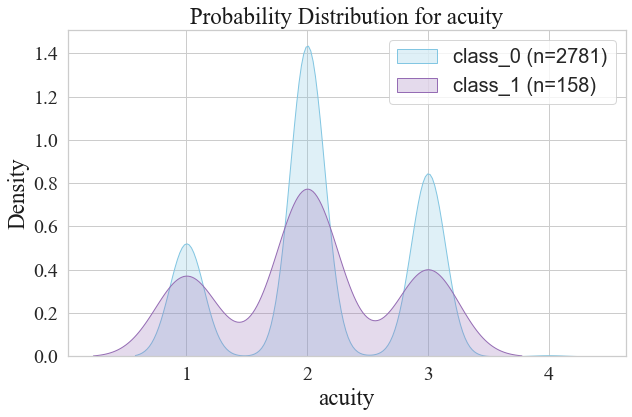

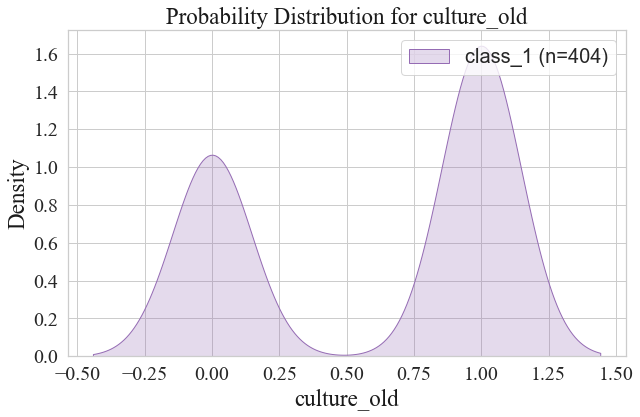

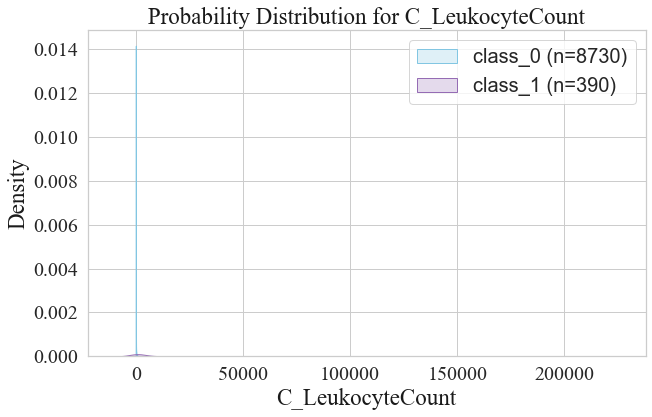

In [32]:
for i in range(df_input.shape[1]-1):
    features = df_input.columns.tolist()[i]
    grouped = df_input.groupby('culture')

    class_0 = grouped.get_group(0)[features].dropna()
    class_1 = grouped.get_group(1)[features].dropna()

    count_class_0 = class_0.count()
    count_class_1 = class_1.count()

    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))

    def plot_with_legend(data, label, count, color):
        if count > 1:

            sns.kdeplot(data, label=f'{label} (n={count})', shade=True, color=color)
        elif count == 1:

            plt.scatter(data, [0], label=f'{label} (n={count})', color=color, zorder=10)
        else:

            plt.plot([], [], label=f'{label} (n={count})', alpha=0, marker='o', markersize=10, color=color)

    colors = sns.color_palette("muted", n_colors=10)
    
    plot_with_legend(class_0, 'class_0', count_class_0, colors[9])
    plot_with_legend(class_1, 'class_1', count_class_1, colors[4])

    plt.title(f'Probability Distribution for {features}', fontdict=font, fontsize=23)
    
    lab_event_name = str(features).replace('<', '').replace('>', '').replace('/', '')
    
    plt.xlabel(lab_event_name, fontdict=font, fontsize=23)
    plt.ylabel('Density', fontdict=font, fontsize=23)
    
    plt.xticks(fontsize=20, fontname='Times New Roman')
    plt.yticks(fontsize=20, fontname='Times New Roman')
    
    plt.legend(fontsize=20)
    plt.show()

    plt.close()

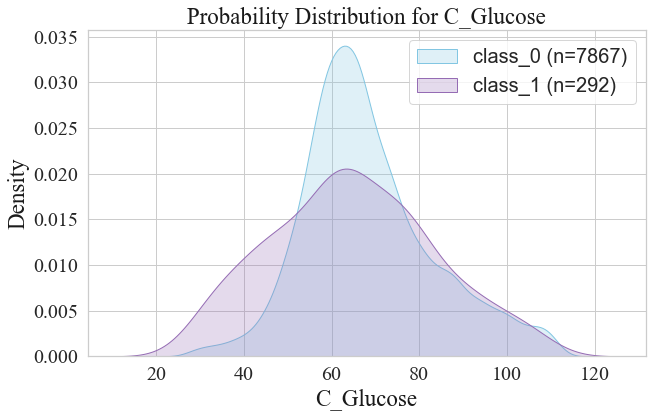

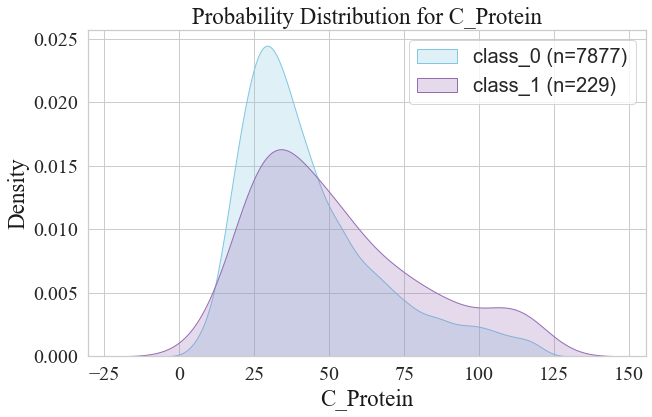

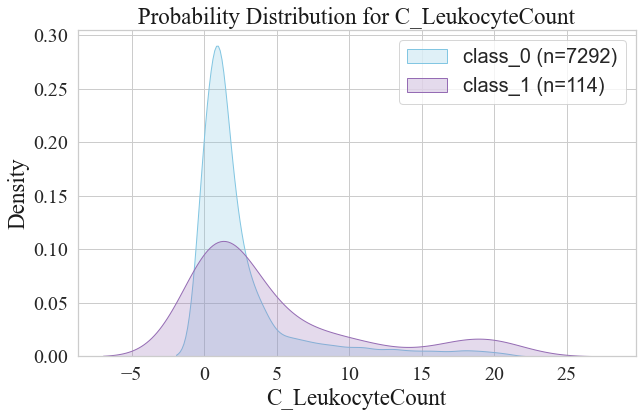

In [33]:
# Give C_Glucose and C_Protein to handle exception values before drawing

# Set the global font size
# plt.rcParams.update({‘font.size’: 25}) # Set the global font size to 25

# Define a function to handle exceptions
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

features_to_process = ['C_Glucose', 'C_Protein','C_LeukocyteCount']

colors = sns.color_palette("muted", n_colors=10)

for feature in features_to_process:

    df_input_processed = remove_outliers(df_input, feature)
    
    grouped = df_input_processed.groupby('culture')
    
    class_0 = grouped.get_group(0)[feature].dropna()
    class_1 = grouped.get_group(1)[feature].dropna()
    
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))

    def plot_with_legend(data, label, count, color):
        if count > 1:
            sns.kdeplot(data, label=f'{label} (n={count})', shade=True, color=color)
        elif count == 1:
            plt.scatter(data, [0], label=f'{label} (n={count})', color=color, zorder=10)
        else:
            plt.plot([], [], label=f'{label} (n={count})', alpha=0, marker='o', markersize=10, color=color)
    
    plot_with_legend(class_0, 'class_0', count_class_0, colors[9])
    plot_with_legend(class_1, 'class_1', count_class_1, colors[4])

    plt.title(f'Probability Distribution for {feature}', fontdict=font, fontsize=23)
    
    lab_event_name = str(feature).replace('<', '').replace('>', '').replace('/', '')
    
    plt.xlabel(lab_event_name, fontdict=font, fontsize=23)
    plt.ylabel('Density', fontdict=font, fontsize=23)
    
    plt.xticks(fontsize=20, fontname='Times New Roman')
    plt.yticks(fontsize=20, fontname='Times New Roman')
    
    plt.legend(fontsize=20)

    filename = f"{lab_event_name}.png"
    plt.show()
    plt.close()

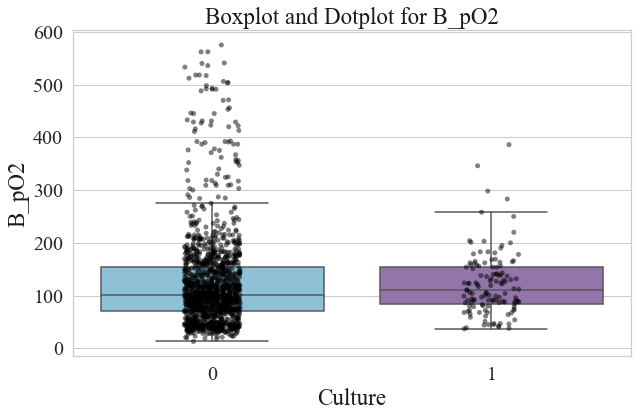

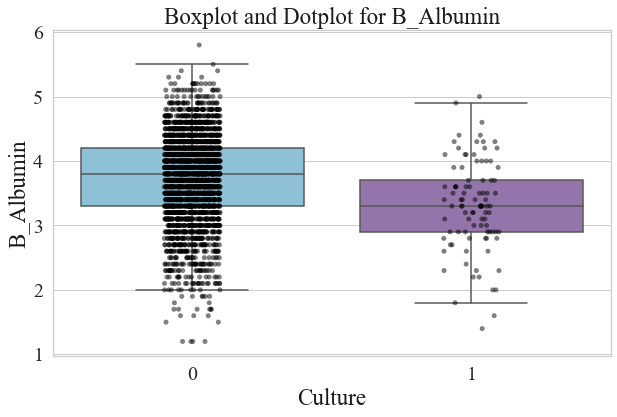

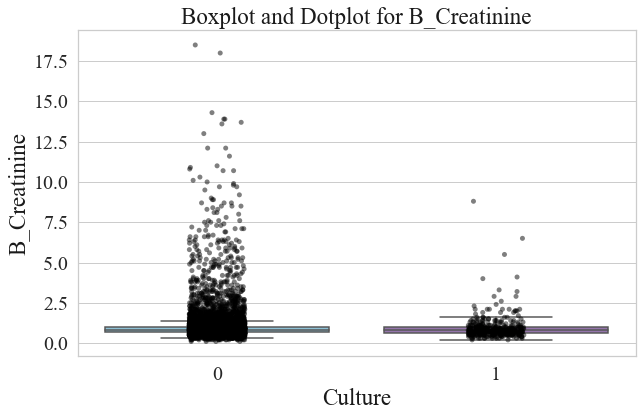

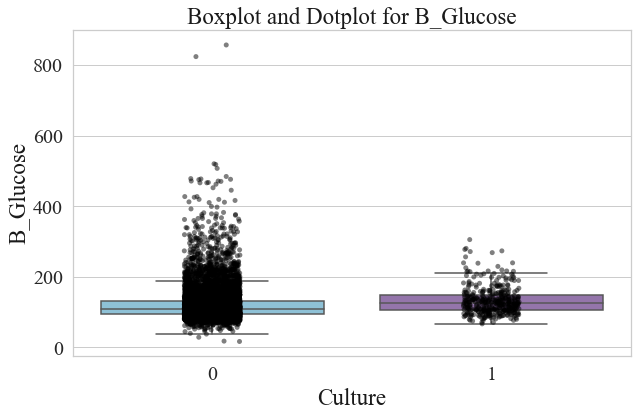

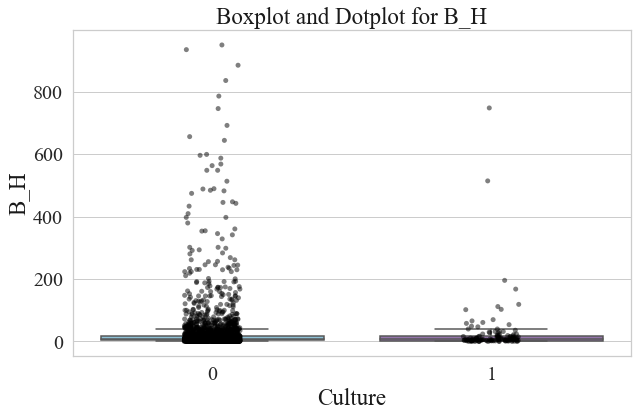

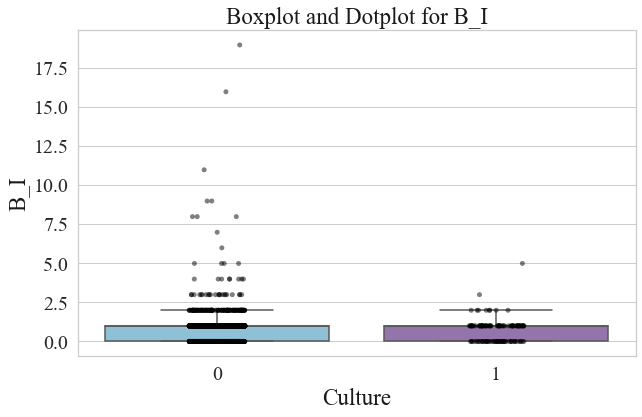

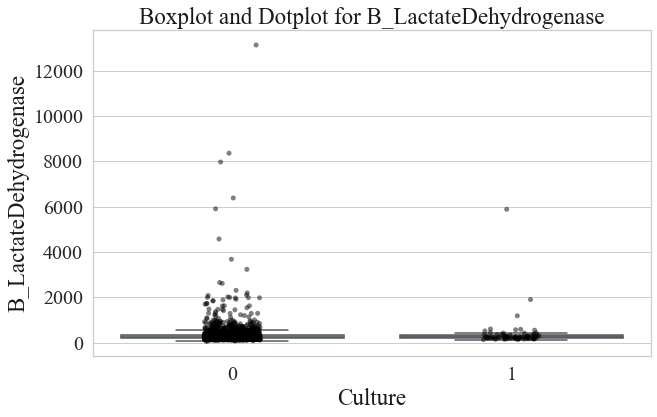

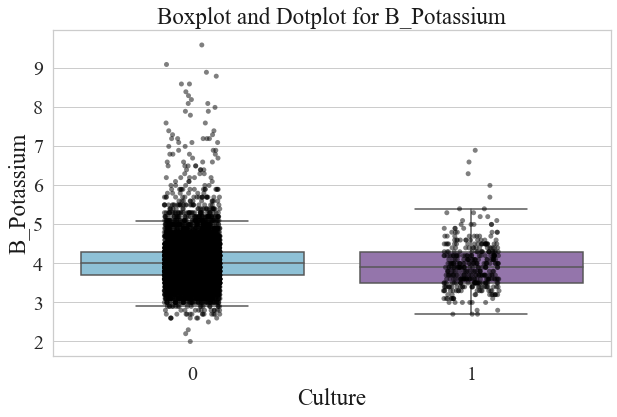

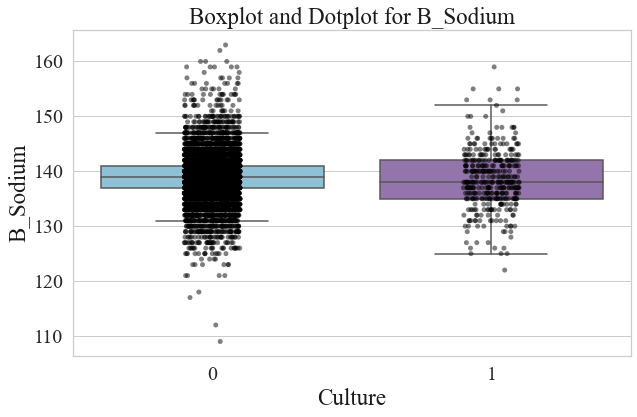

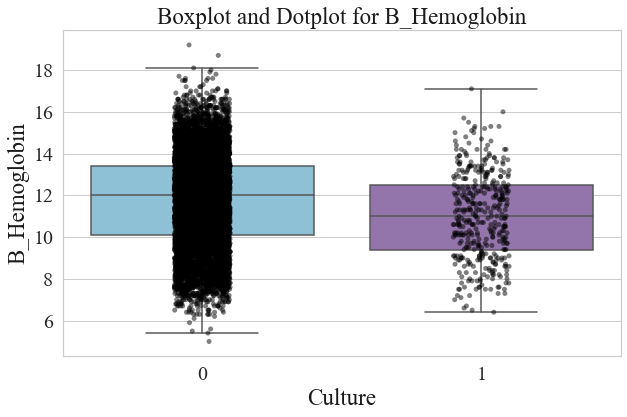

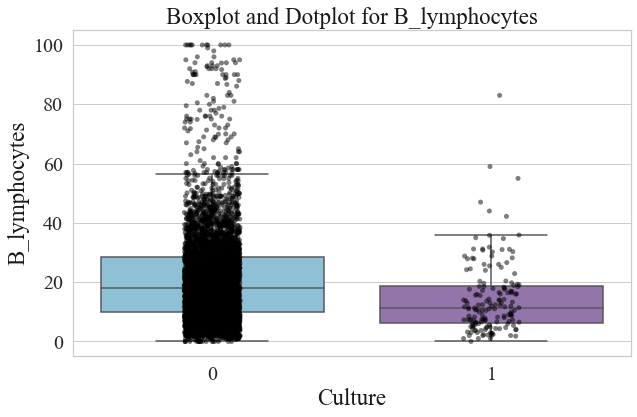

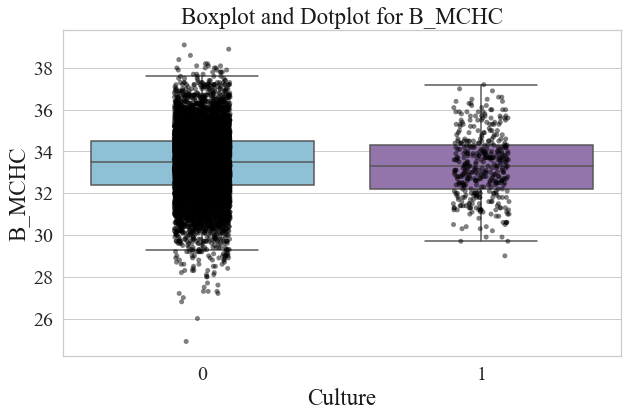

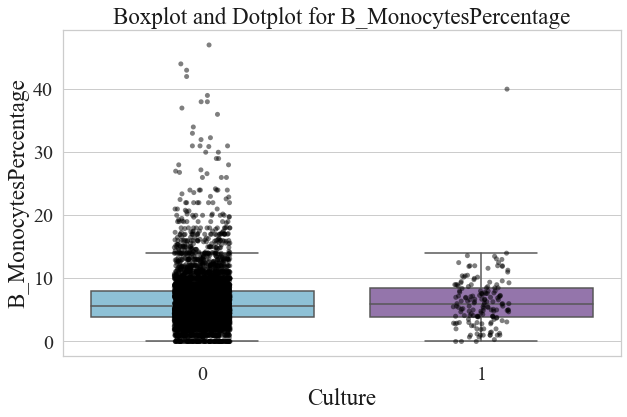

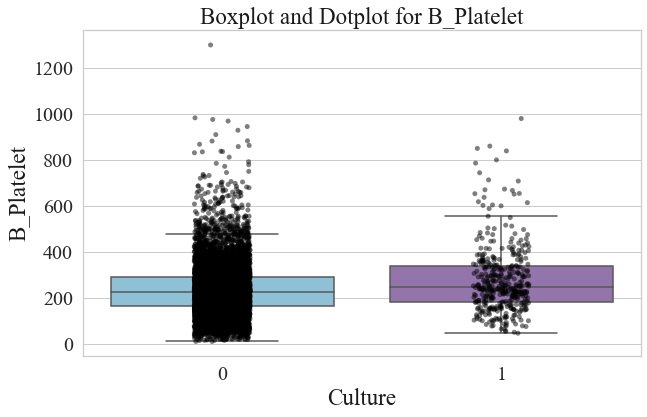

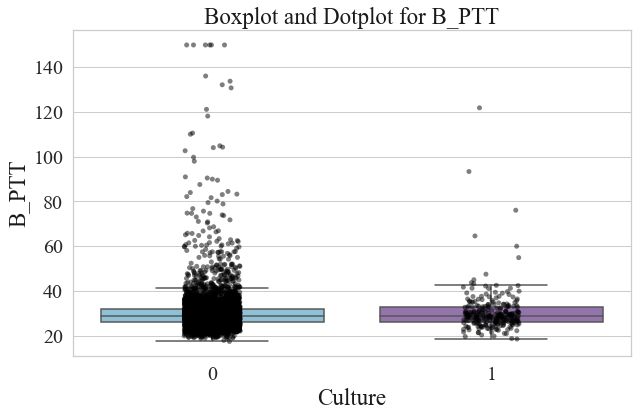

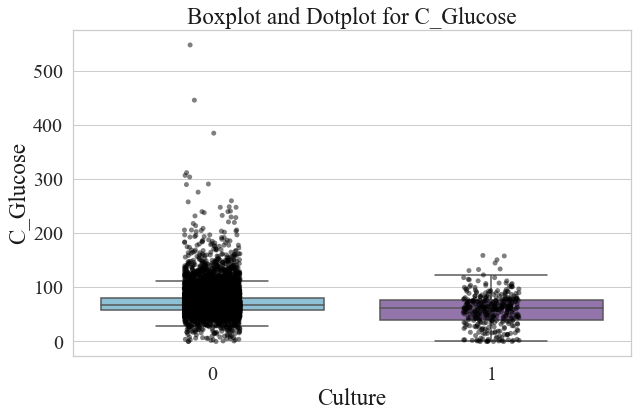

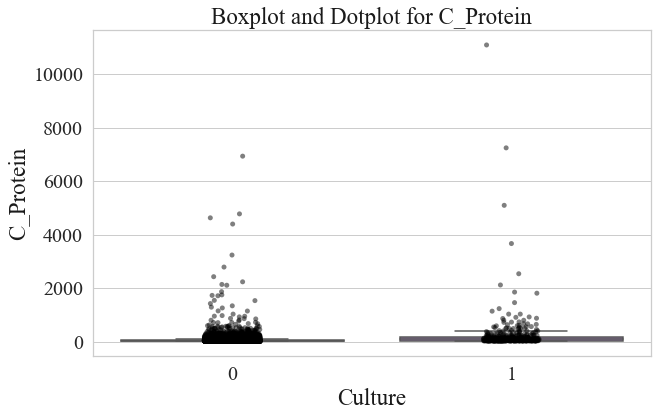

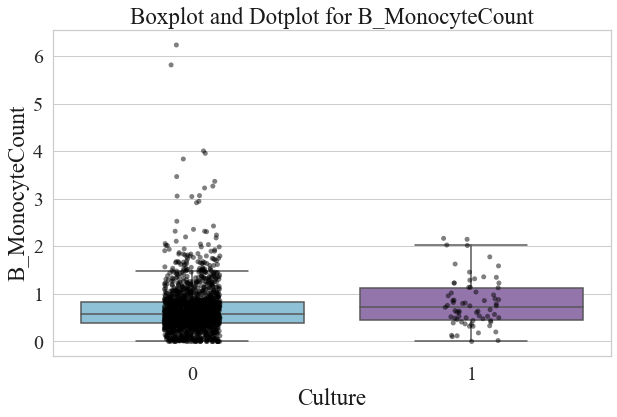

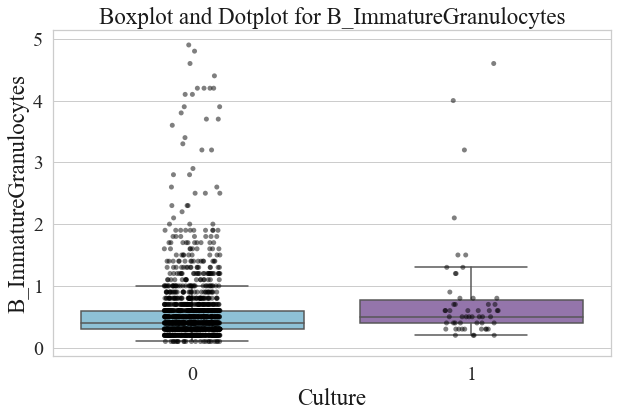

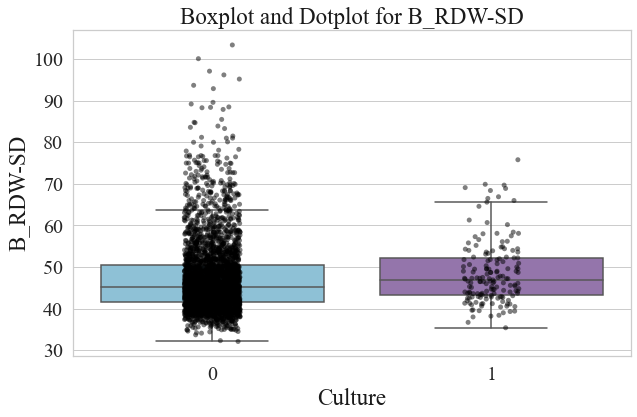

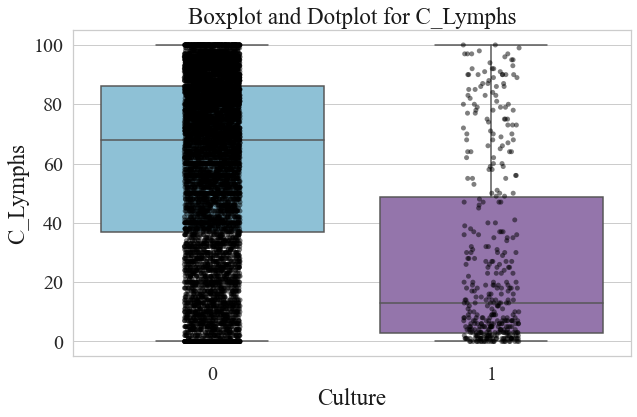

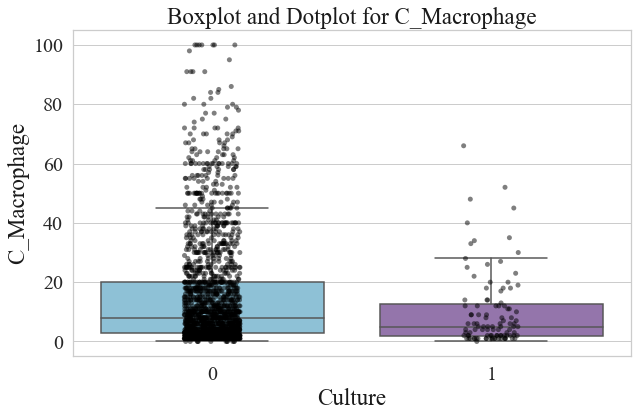

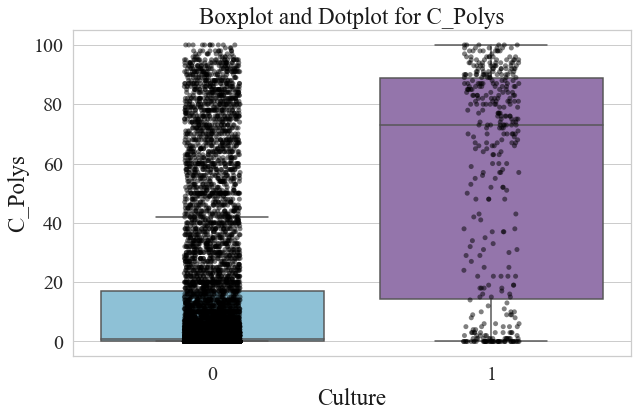

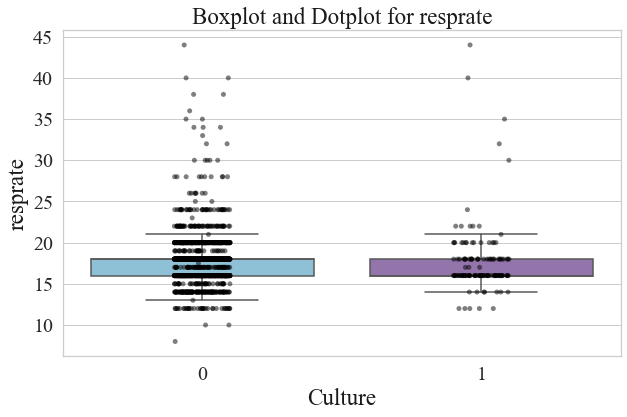

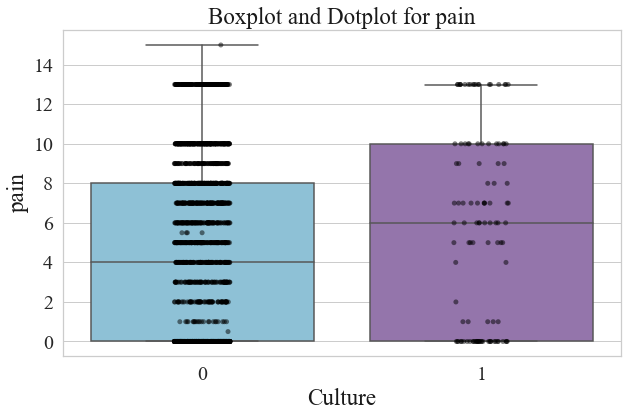

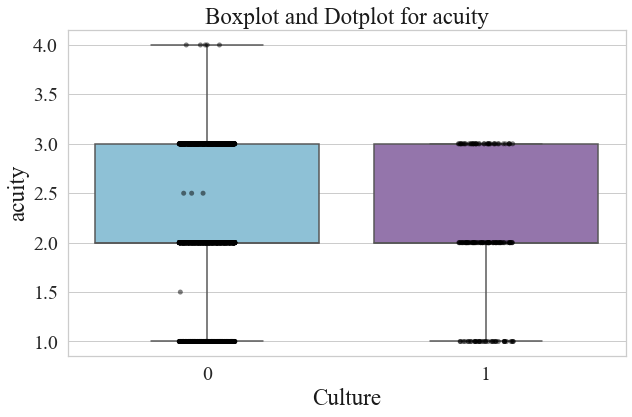

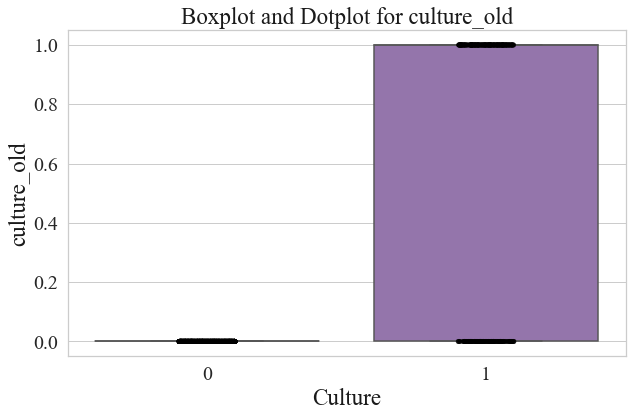

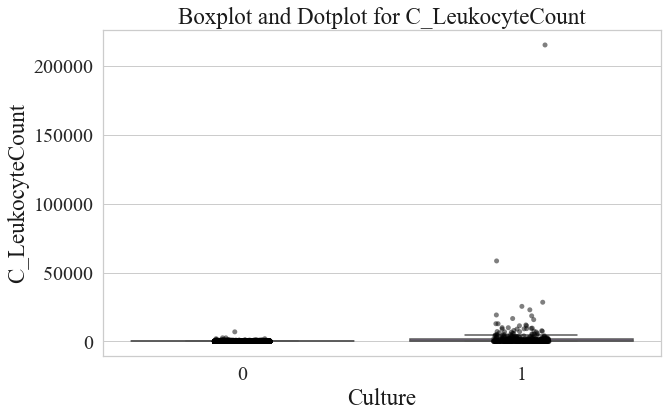

In [34]:
colors = sns.color_palette("muted", n_colors=10)

for i in range(df_input.shape[1] - 1):
    features = df_input.columns.tolist()[i]
    grouped = df_input.groupby('culture')
    
    class_0 = grouped.get_group(0)[features].dropna()
    class_1 = grouped.get_group(1)[features].dropna()
    
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))

    sns.boxplot(x='culture', y=features, data=df_input, palette=[colors[9], colors[4]], showfliers=False)

    sns.stripplot(x='culture', y=features, data=df_input, jitter=True, dodge=True, marker='o', alpha=0.5, color='black', size=5)

    plt.title(f'Boxplot and Dotplot for {features}', fontdict=font, fontsize=23)
    plt.xlabel('Culture', fontdict=font, fontsize=23)
    plt.ylabel(features, fontdict=font, fontsize=23)

    plt.xticks(fontsize=20, fontname='Times New Roman')
    plt.yticks(fontsize=20, fontname='Times New Roman')
    lab_event_name = str(features).replace('<', '').replace('>', '').replace('/', '')
    filename = f"{lab_event_name}.png"
    plt.show()
    plt.close()

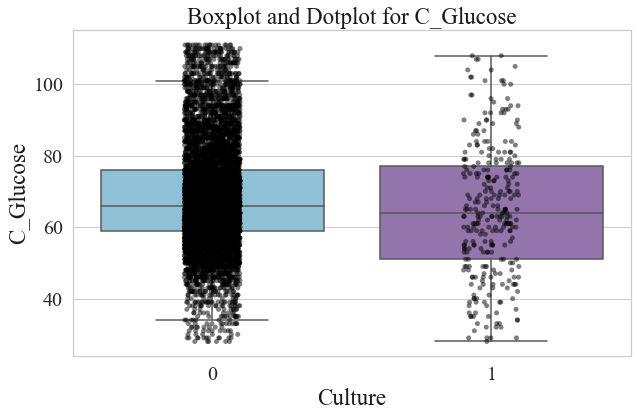

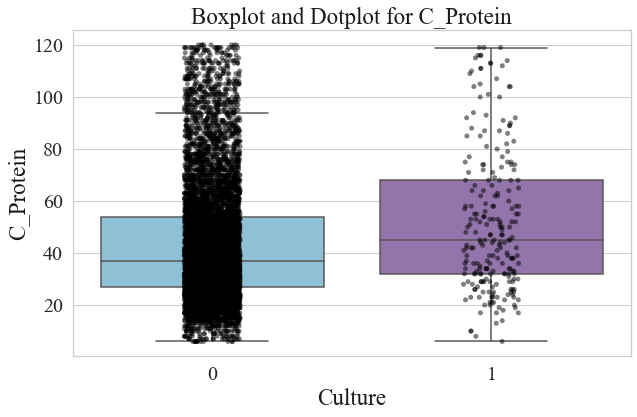

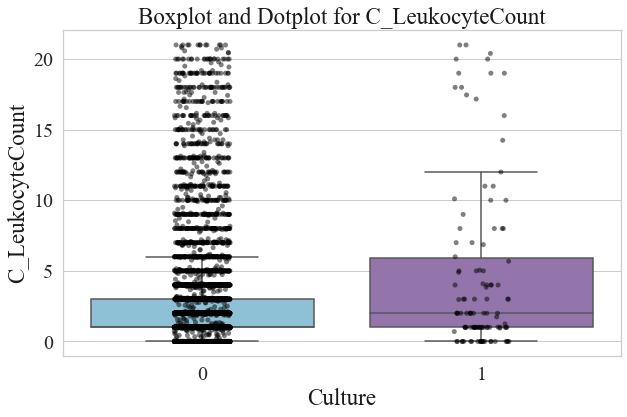

In [35]:
# Give C_Glucose and C_Protein to handle outliers before drawing the diagram

# Define a function to handle the outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

features_to_process = ['C_Glucose', 'C_Protein','C_LeukocyteCount']

colors = sns.color_palette("muted", n_colors=10)

for feature in features_to_process:

    df_input_processed = remove_outliers(df_input, feature)
    
    grouped = df_input_processed.groupby('culture')
    
    class_0 = grouped.get_group(0)[feature].dropna()
    class_1 = grouped.get_group(1)[feature].dropna()
    
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))

    sns.boxplot(x='culture', y=feature, data=df_input_processed, palette=[colors[9], colors[4]], showfliers=False)

    sns.stripplot(x='culture', y=feature, data=df_input_processed, jitter=True, dodge=True, marker='o', alpha=0.5, color='black', size=5)

    plt.title(f'Boxplot and Dotplot for {feature}', fontdict=font, fontsize=23)
    plt.xlabel('Culture', fontdict=font, fontsize=23)
    plt.ylabel(feature, fontdict=font, fontsize=23)

    plt.xticks(fontsize=20, fontname='Times New Roman')
    plt.yticks(fontsize=20, fontname='Times New Roman')

    lab_event_name = str(feature).replace('<', '').replace('>', '').replace('/', '')
    filename = f"{lab_event_name}.png"
    plt.show()

    plt.close()

In [36]:
# Initialise an empty DataFrame to store the results
results = pd.DataFrame(columns=['Feature', 'Min', 'Max', 'Mean_0', 'Mean_1', 'Std_0', 'Std_1', 'Count_0', 'Count_1', 'P_value'])

for feature in df_input.columns[:-1]:
    group_0 = df_input[df_input['culture'] == 0][feature].dropna()
    group_1 = df_input[df_input['culture'] == 1][feature].dropna()

    count_0 = group_0.count()  
    count_1 = group_1.count()  

    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    std_0 = group_0.std()
    std_1 = group_1.std()

    min_value = df_input[feature].min()
    max_value = df_input[feature].max()

    _, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')

    results = results.append({
        'Feature': feature,
        'Min': min_value,
        'Max': max_value,
        'Mean_0': mean_0,
        'Mean_1': mean_1,
        'Std_0': std_0,
        'Std_1': std_1,
        'Count_0': count_0,
        'Count_1': count_1,
        'P_value': p_value
    }, ignore_index=True)

results.to_csv('aim1_feature_distribution_and_p_values_corrected.csv', index=False)
results

Feature    Min        Max      Mean_0       Mean_1  \
0                    B_pO2   13.0     575.00  125.257037   121.595238   
1                B_Albumin    1.2       5.80    3.743344     3.314737   
2             B_Creatinine    0.1      18.50    1.029267     0.921500   
3                B_Glucose   17.0     858.00  121.689639   132.478589   
4                      B_H    0.0     951.00   27.962241    27.857143   
5                      B_I    0.0      19.00    0.857897     0.730159   
6   B_LactateDehydrogenase   48.0   13130.00  331.763014   378.041667   
7              B_Potassium    2.0       9.60    4.036144     3.941353   
8                 B_Sodium  109.0     163.00  138.924618   138.541353   
9             B_Hemoglobin    5.0      19.20   11.779369    11.013184   
10           B_lymphocytes    0.0     100.00   20.892743    14.601250   
11                  B_MCHC   24.9      39.10   33.420760    33.310945   
12   B_MonocytesPercentage    0.0      47.00    6.347253     6.313125   
13              B_Platelet   12.0    1302.00  238.496822   279.957711   
14                   B_PTT   17.4     150.00   30.448567    30.601181   
15               C_Glucose    0.0     548.00   72.494231    58.549180   
16               C_Protein    6.0   11100.00   64.685202   251.485488   
17         B_MonocyteCount    0.0       6.24    0.669587     0.810435   
18  B_ImmatureGranulocytes    0.1       4.90    0.593894     0.798148   
19                B_RDW-SD   32.1     103.40   47.480900    48.569375   
20                C_Lymphs    0.0     100.00   59.647200    27.638462   
21            C_Macrophage    0.0     100.00   15.406716    10.155340   
22                 C_Polys    0.0     100.00   15.042826    56.405128   
23                resprate    8.0      44.00   17.619529    17.748092   
24                    pain    0.0      15.00    4.339487     5.800000   
25                  acuity    1.0       4.00    2.119022     2.018987   
26             culture_old    0.0       1.00    0.000000     0.606436   
27        C_LeukocyteCount    0.0  215373.00   35.692529  2446.683821   

         Std_0         Std_1 Count_0 Count_1        P_value  
0    90.088466     60.342778    1350     126   6.549967e-01  
1     0.678653      0.704087    2757      95   1.692334e-09  
2     0.995673      0.731591    8706     400   3.251879e-02  
3    48.394378     39.005797    8445     397   1.224795e-05  
4    75.932854     84.186147    2463     126   9.879771e-01  
5     0.884992      0.731166    2463     126   1.113866e-01  
6   490.006711    701.597964    2190      72   4.379240e-01  
7     0.553209      0.574298    8635     399   8.397058e-04  
8     4.204059      5.266054    8636     399   7.870395e-02  
9     2.250725      2.064593    8812     402   2.237425e-11  
10   15.218144     12.239980    5388     160   2.300602e-07  
11    1.573435      1.527513    8810     402   1.706595e-01  
12    4.140927      4.263611    5388     160   9.182468e-01  
13  110.396773    146.410930    8810     402   4.666844e-13  
14    9.296906      9.704620    4989     254   7.989993e-01  
15   25.835570     29.797978    8494     366   1.324005e-23  
16  156.707256    788.550379    8596     379   1.417293e-56  
17    0.491664      0.512340    1818      69   1.980114e-02  
18    0.558563      0.866894    1474      54   1.006019e-02  
19    8.659762      7.601680    3178     160   1.188807e-01  
20   30.622381     31.080624    8733     390   1.159096e-88  
21   18.644644     12.539160    1876     103   4.800948e-03  
22   25.873879     36.983217    8733     390  2.561639e-191  
23    2.661135      4.382383    2422     131   6.055414e-01  
24    4.430493      4.834509    2302     110   7.825750e-04  
25    0.692614      0.709099    2781     158   7.788284e-02  
26    0.000000      0.489146    8857     404   0.000000e+00  
27  145.922438  11737.464041    8730     390   1.995031e-80

In [37]:
# delete the duplicate samples
# The dataset extracted this time was awesome, not a single duplicate and very low redundancy!
df_input = df_input.drop_duplicates(keep='first')
df_input

B_pO2  B_Albumin  B_Creatinine  B_Glucose   B_H  B_I  \
0       NaN        NaN           0.7       92.0   NaN  NaN   
1       NaN        3.6           0.6       95.0   NaN  NaN   
2       NaN        2.6           1.2       76.0   NaN  NaN   
3       NaN        NaN           0.8      105.0   NaN  NaN   
4       NaN        4.9           1.0      111.0  12.0  2.0   
...     ...        ...           ...        ...   ...  ...   
9256    NaN        NaN           0.8      155.0   NaN  NaN   
9257    NaN        NaN           0.7      140.0   NaN  NaN   
9258    NaN        2.3           0.7       53.0   NaN  NaN   
9259   99.0        3.4           0.8       87.0   8.0  5.0   
9260    NaN        4.3           NaN        NaN   3.0  1.0   

      B_LactateDehydrogenase  B_Potassium  B_Sodium  B_Hemoglobin  \
0                        NaN          3.7     144.0          11.7   
1                      187.0          3.7     137.0          12.6   
2                        NaN          4.9     137.0           9.7   
3                        NaN          3.9     142.0          15.3   
4                        NaN          4.6     128.0           8.4   
...                      ...          ...       ...           ...   
9256                     NaN          3.6     137.0          11.6   
9257                   180.0          3.7     140.0          13.0   
9258                     NaN          3.8     135.0          10.7   
9259                   453.0          3.9     145.0          11.0   
9260                   102.0          NaN       NaN          12.6   

      B_lymphocytes  B_MCHC  B_MonocytesPercentage  B_Platelet  B_PTT  \
0              21.9    33.0                    3.8       226.0   27.5   
1              11.2    34.3                    5.9       198.0    NaN   
2               NaN    30.8                    NaN       557.0    NaN   
3              26.1    34.9                    4.0       256.0    NaN   
4               6.6    27.2                    7.7       225.0    NaN   
...             ...     ...                    ...         ...    ...   
9256           13.0    36.0                    8.5       257.0    NaN   
9257            7.2    36.5                    5.6       218.0    NaN   
9258           24.3    32.3                    6.6       377.0   27.2   
9259           18.5    32.3                   11.8        88.0   30.6   
9260           20.5    32.1                    6.6       275.0    NaN   

      C_Glucose  C_Protein  B_MonocyteCount  B_ImmatureGranulocytes  B_RDW-SD  \
0          55.0       29.0              NaN                     NaN       NaN   
1          61.0       24.0              NaN                     NaN       NaN   
2          61.0       75.0              NaN                     NaN       NaN   
3          60.0       72.0              NaN                     NaN       NaN   
4          57.0      100.0             0.77                     0.4      45.3   
...         ...        ...              ...                     ...       ...   
9256       70.0      295.0              NaN                     NaN       NaN   
9257        1.0      590.0              NaN                     NaN       NaN   
9258       42.0       44.0              NaN                     NaN       NaN   
9259       87.0       21.0             0.83                     0.4      53.9   
9260       57.0      146.0             0.33                     0.2      44.5   

      C_Lymphs  C_Macrophage  C_Polys  resprate  pain  acuity  culture_old  \
0        100.0           NaN      0.0       NaN   NaN     NaN            0   
1         43.0           2.0     17.0       NaN   NaN     NaN            0   
2         41.0          49.0     10.0      16.0  13.0     2.0            0   
3         62.0           NaN      0.0       NaN   NaN     NaN            0   
4         96.0           NaN      1.0      19.0   9.0     3.0            0   
...        ...           ...      ...       ...   ...     ...          ...   
9256       0.0           NaN    100.

In [38]:
df_input.to_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.2.csv",index=False)